In [1]:
#import mysql.connector as sql
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost
import matplotlib.pyplot as plt
%matplotlib inline

db_connection = sql.connect(host = '127.0.0.1', database = 'dataset1', user = 'root' , password = 'ashutosh49')
df1=pd.read_sql('SELECT * FROM telcomcustomerchurn_1', con=db_connection)

df1=df1.drop(df1[['telcomcustomerchurn_1_id']],axis=1)
df1

### Since the data from telcomcustomer-churn_2 cannot be opened in MySQL, we will be directly importing the data from the .csv file.

df2 = pd.read_csv('TelcomCustomer-Churn_2.csv')
df2

print(df1.shape)
print(df2.shape)
print(df1.size)
print(df2.size)

df=pd.merge(df1,df2,left_index=True, right_index=True)
df

In [3]:
df = pd.read_csv('TelcomCustomer-Churn.csv')

In [4]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,5131-PONJI,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043,NaN,NaN,NaN,0.162147,0.368612,0,0,0,0,1
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043,NaN,NaN,NaN,32.3711,24.5595,0,9,29,55,72
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# data cleansing

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,5131-PONJI,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043,NaN,NaN,NaN,0.162147,0.368612,0,0,0,0,1
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043,NaN,NaN,NaN,32.3711,24.5595,0,9,29,55,72
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [25]:
print(df.gender.value_counts())
print(df.SeniorCitizen.value_counts())
print(df.Partner.value_counts())
print(df.Dependents.value_counts())
print(df.PhoneService.value_counts())
print(df.MultipleLines.value_counts())
print(df.InternetService.value_counts())
print(df.OnlineSecurity.value_counts())
print(df.OnlineBackup.value_counts())
print(df.DeviceProtection.value_counts())
print(df.TechSupport.value_counts())
print(df.StreamingTV.value_counts())
print(df.StreamingMovies.value_counts())
print(df.Contract.value_counts())
print(df.PaperlessBilling.value_counts())
print(df.PaymentMethod.value_counts())
print(df.Churn.value_counts())

1    3555
0    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
0    4072
1    2971
Name: MultipleLines, dtype: int64
2    3096
1    2421
0    1526
Name: InternetService, dtype: int64
0    5024
1    2019
Name: OnlineSecurity, dtype: int64
0    4614
1    2429
Name: OnlineBackup, dtype: int64
0    4621
1    2422
Name: DeviceProtection, dtype: int64
0    4999
1    2044
Name: TechSupport, dtype: int64
0    4336
1    2707
Name: StreamingTV, dtype: int64
0    4311
1    2732
Name: StreamingMovies, dtype: int64
0    3875
2    1695
1    1473
Name: Contract, dtype: int64
1    4171
0    2872
Name: PaperlessBilling, dtype: int64
0    2365
1    1612
2    1544
3    1522
Name: PaymentMethod, dtype: int64
0    5174
1    1869
Name: Churn, dtype: int64


In [29]:
replaceStruct= {
    "gender" : {"Female" : 0, "Male" : 1},
    "Partner" : {"No": 0, "Yes": 1},
    "Dependents" : {"No": 0, "Yes": 1},
    "PhoneService" : {"No": 0, "Yes": 1},
    "MultipleLines" : {"No": 0, "Yes": 1, "No phone service" : 0},
    "InternetService" : {"No" :0, "DSL" : 1 , "Fiber optic" : 2},
    "OnlineSecurity" : {"No" : 0 , "Yes" : 1, "No internet service" : 0},
    "OnlineBackup" : {"No" : 0 , "Yes" : 1 , "No internet service" : 0},
    "DeviceProtection" : {"No" : 0 , "Yes" : 1, "No internet service" : 0},
    "TechSupport" : {"No" : 0 , "Yes" : 1 , "No internet service" : 0},
    "StreamingTV" : {"No" : 0 , "Yes" : 1, "No internet service" : 0},
    "StreamingMovies" : {"No" : 0 , "Yes" : 1 , "No internet service" : 0},
    "Contract" : {"Month-to-month": 0 , "One year" : 1 , "Two year" : 2},
    "PaperlessBilling" : {"No": 0, "Yes": 1},
    "PaymentMethod" : {"Electronic check" : 0 , "Mailed check" : 1, "Bank transfer (automatic)" : 2 , "Credit card (automatic)" : 3},
    "Churn" : {"No": 0, "Yes": 1}
}

In [30]:
df=df.replace(replaceStruct)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [31]:
df.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,No,1,No,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,No,No,34,Yes,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,No,No,2,Yes,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,No,No,45,No,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,No,No,2,Yes,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1
5,0,0,No,No,8,Yes,1,2,0,0,1,0,1,1,0,1,0,99.65,820.50,1
6,1,0,No,Yes,22,Yes,1,2,0,1,0,0,1,0,0,1,3,89.10,1949.40,0
7,0,0,No,No,10,No,0,1,1,0,0,0,0,0,0,0,1,29.75,301.90,0
8,0,0,Yes,No,28,Yes,1,2,0,0,1,1,1,1,0,1,0,104.80,3046.05,1
9,1,0,No,Yes,62,Yes,0,1,1,1,0,0,0,0,1,0,2,56.15,3487.95,0


Since the column of customerID will not provide any meaningful insight in the data, we will drop the column.

In [13]:
df=df.drop(df[['customerID']],axis=1)

The data type of the TotalCharges column is object. So, we convert it to float64. And fill the missing values with the mean of the data.

In [14]:
df.TotalCharges= pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges=df.TotalCharges.fillna(np.mean(df.TotalCharges))

# Data analysis & visualisation

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


<AxesSubplot:xlabel='tenure', ylabel='Count'>

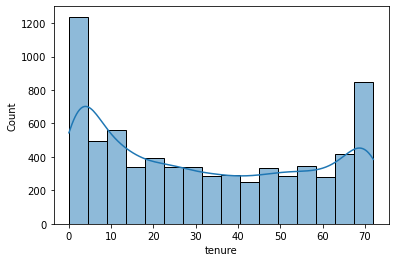

In [16]:
sns.histplot(df.tenure,kde=True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

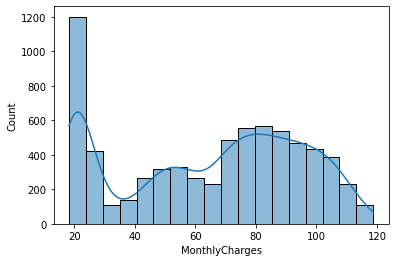

In [17]:
sns.histplot(df.MonthlyCharges,kde=True)

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

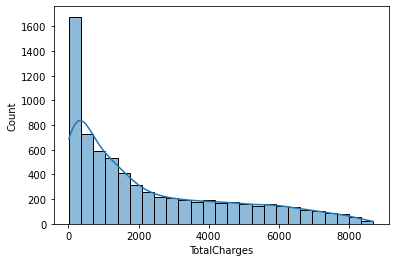

In [18]:
sns.histplot(df.TotalCharges,kde=True)

bivariate

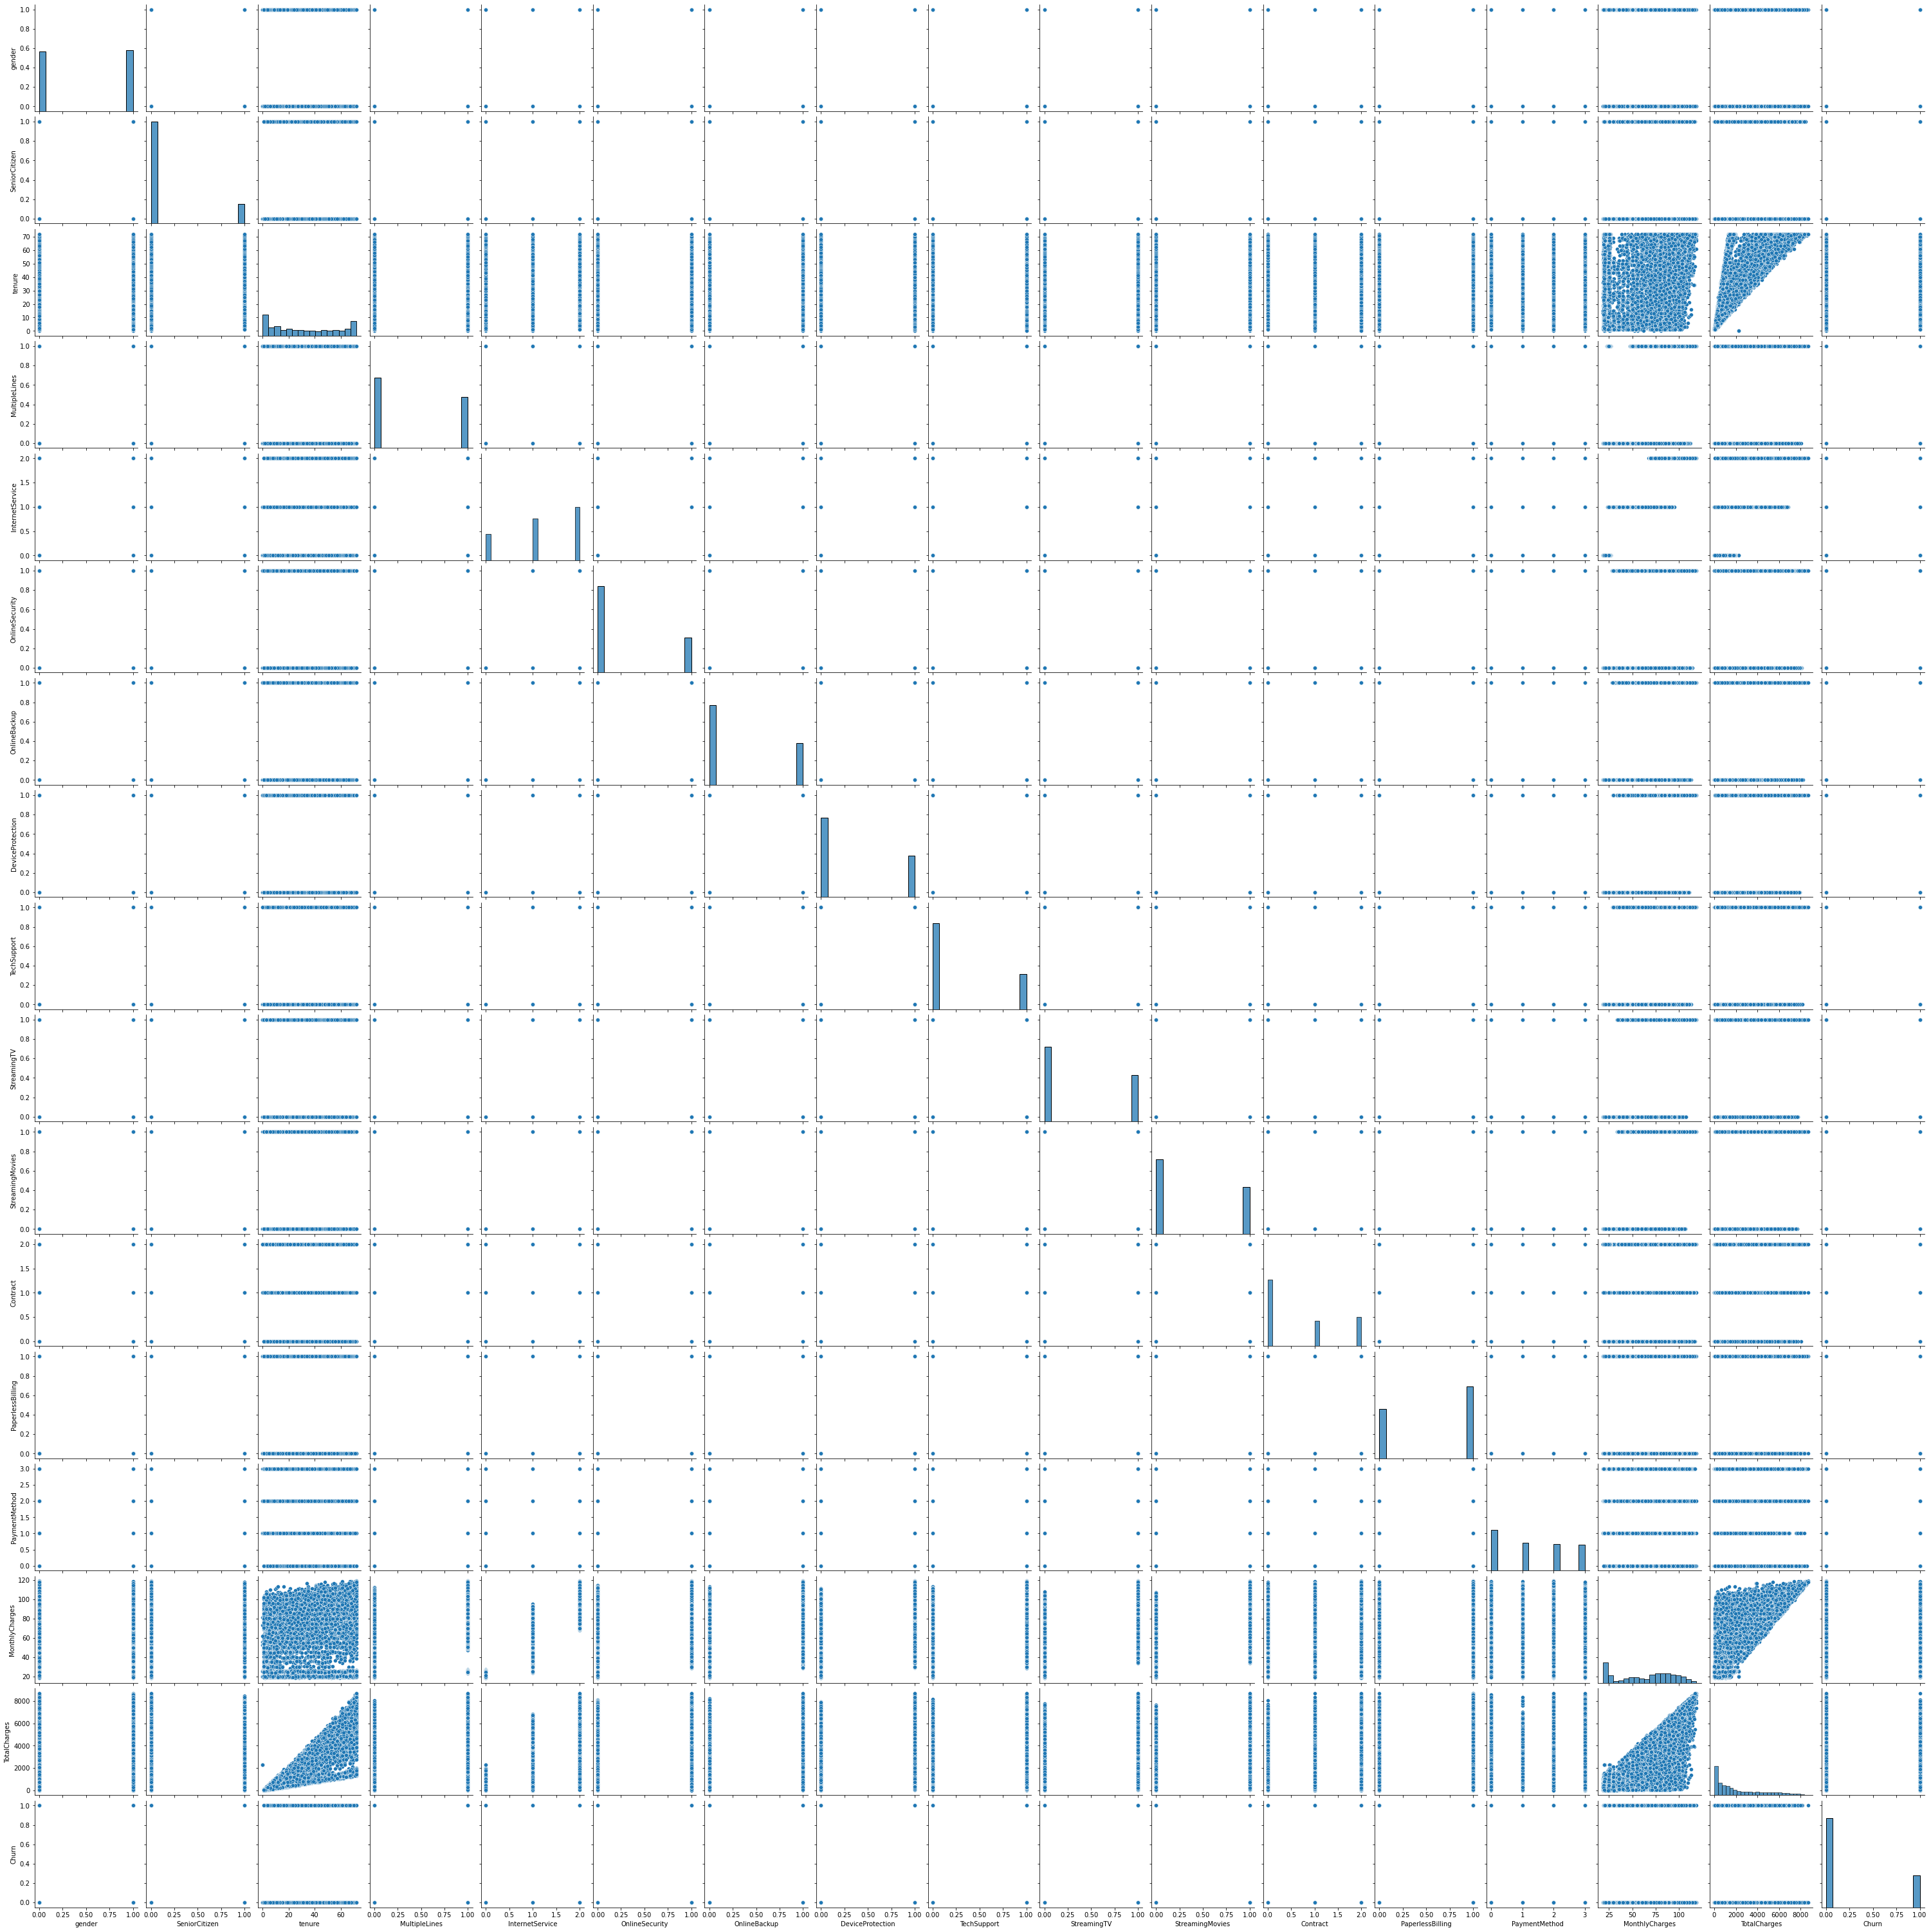

In [19]:
sns.pairplot(df)

In [20]:
correl=df.corr()
correl

,gender,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,0.005106,-0.008414,-0.010380,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,-0.005209,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016567,0.142948,0.259390,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.093704,0.220173,0.102395,0.150889
tenure,0.005106,0.016567,1.000000,0.331941,0.033230,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,0.340305,0.247900,0.824757,-0.352229
MultipleLines,-0.008414,0.142948,0.331941,1.000000,0.344684,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,0.035851,0.490434,0.468689,0.040102
InternetService,-0.010380,0.259390,0.033230,0.344684,1.000000,0.156799,0.307420,0.313603,0.164833,0.429707,0.427264,-0.290189,0.378108,-0.178137,0.905491,0.427749,0.316846
OnlineSecurity,-0.017021,-0.038653,0.327203,0.098108,0.156799,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,0.163367,0.296594,0.412245,-0.171226
OnlineBackup,-0.013773,0.066572,0.360277,0.202237,0.307420,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,0.096550,0.441780,0.509692,-0.082255
DeviceProtection,-0.002105,0.059428,0.360653,0.201137,0.313603,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.219310,0.103797,0.111241,0.482692,0.522462,-0.066160
TechSupport,-0.009212,-0.060625,0.324221,0.100571,0.164833,0.354931,0.294233,0.333313,1.000000,0.278070,0.279358,0.293691,0.037880,0.167701,0.338304,0.432480,-0.164674
StreamingTV,-0.008393,0.105378,0.279756,0.257152,0.429707,0.176207,0.282106,0.390874,0.278070,1.000000,0.533094,0.103944,0.223841,-0.013826,0.629603,0.515314,0.063228


<AxesSubplot:>

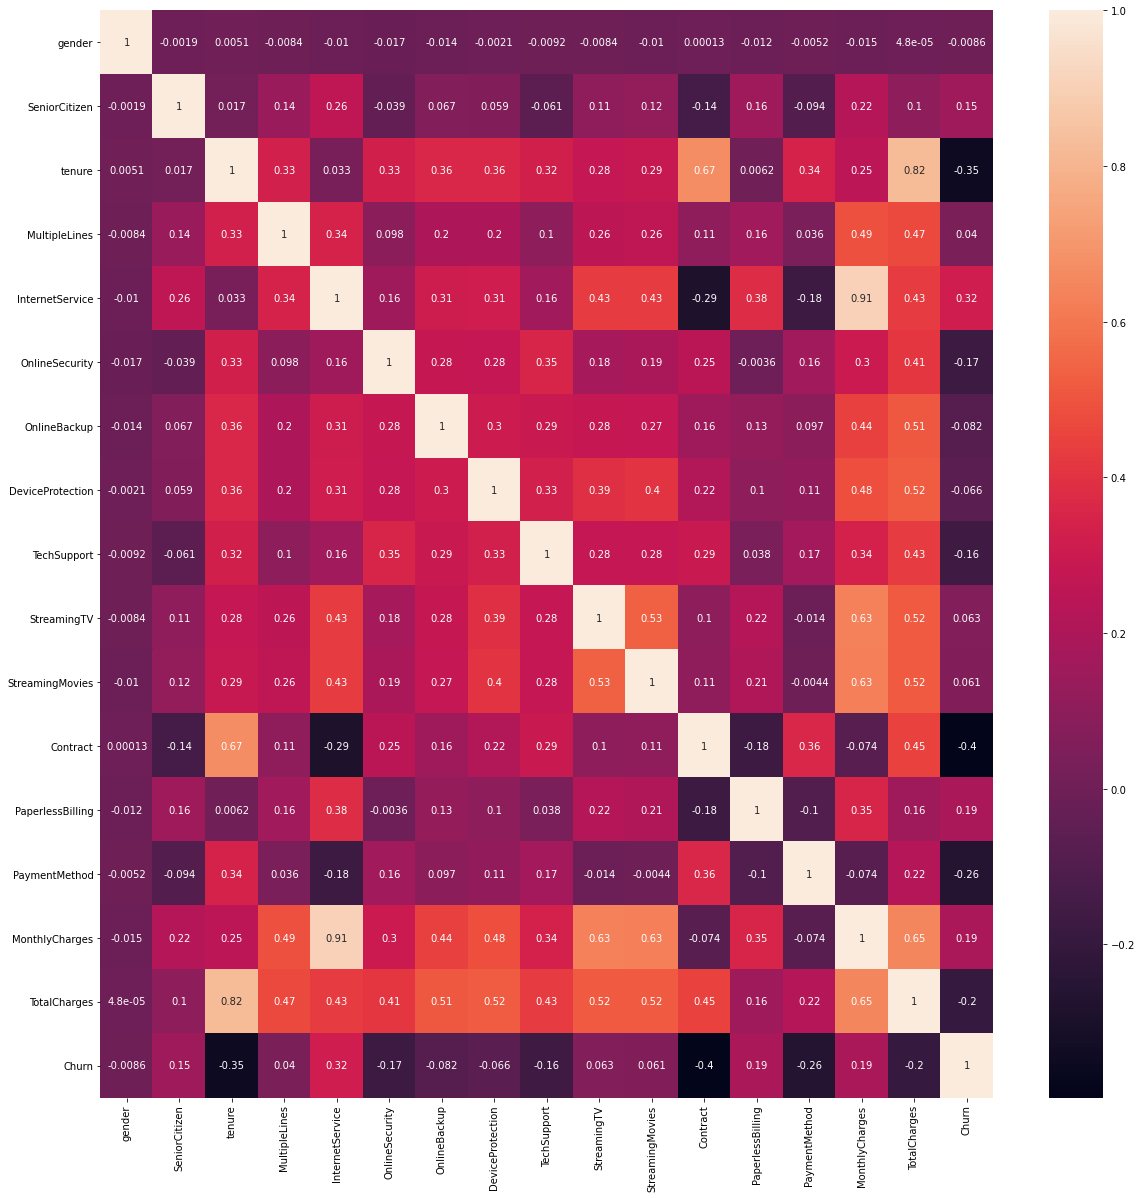

In [21]:
plt.subplots(figsize=(20,20))
sns.heatmap(correl,annot=True)

In [22]:
X=df.drop(df[['Churn']],axis=1)
y=df[['Churn']]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [24]:
from sklearn.tree import DecisionTreeClassifier

dTree=DecisionTreeClassifier(criterion='gini',random_state=1)
dTree.fit(X_train,y_train)

ValueError: could not convert string to float: 'No'

In [ ]:
print(dTree.score(X_train,y_train))
print(dTree.score(X_test,y_test))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fn=list(X_train)
cn=["0","1"]
fig,axes=plt.subplots(nrows =1, ncols=1, figsize=(4,4),dpi=300)
plot_tree(dTree,feature_names = fn, class_names=cn, filled= True)
fig.savefig("dtree.png")

In [ ]:
print(pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

In [ ]:
decTree=DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=1)
decTree.fit(X_train,y_train)

In [ ]:
print(decTree.score(X_train,y_train))
print(decTree.score(X_test,y_test))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fn=X_train.columns
cn=["0","1"]
fig,axes=plt.subplots(nrows =1, ncols=1, figsize=(10,10),dpi=500)
plot_tree(decTree,feature_names = fn, class_names=cn, filled= True)
fig.savefig("dectree.png")

In [ ]:
print (pd.DataFrame(decTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

In [ ]:
from sklearn.metrics import confusion_matrix
y_predict = decTree.predict(X_test)
cm=confusion_matrix(y_test, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm,index = [i for i in ["0","1"]],columns = [i for i in ["0","1"]])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt= 'g')

# Ensemble Learning - Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
bgcl=BaggingClassifier(base_estimator=decTree,n_estimators=50, random_state=1)
bgcl = bgcl.fit(X_train,y_train)

In [ ]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_train,y_train))
print(bgcl.score(X_test,y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - AdaBoosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)

In [ ]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_train , y_train))
print(abcl.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
# parameter grid
param_grid = {"base_estimator__max_depth" : [2, 5],
              "n_estimators": [200, 400, 600]
             }

In [ ]:

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=dectree,
    learning_rate=0.6,
    algorithm="SAMME")

In [ ]:
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)


In [ ]:
# fit 
grid_search_ABC.fit(X_train, y_train)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

In [ ]:
# plotting AUC with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

    


# Ensemble Learning - GradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [ ]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_train, y_train))
print(gbcl.score(X_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
# parameter grid
param_grid = {"learning_rate": [0.2, 0.6, 0.9],
              "subsample": [0.3, 0.6, 0.9]
             }

In [ ]:
# adaboost with the tree as base estimator
GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [ ]:
# run grid search
folds = 3
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

grid_search_GBC.fit(X_train, y_train)

In [ ]:
cv_results = pd.DataFrame(grid_search_GBC.cv_results_)
cv_results.head()

In [ ]:
# # plotting
plt.figure(figsize=(16,6))


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


# Ensemble Learning - RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

In [ ]:
y_predict = rfcl.predict(X_test)

print(rfcl.score(X_train, y_train))
print(rfcl.score(X_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### XGBoost

Let's finally try XGBoost. The hyperparameters are the same, some important ones being ```subsample```, ```learning_rate```, ```max_depth``` etc.


In [ ]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test)
y_pred[:10]

In [ ]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

The roc_auc in this case is about 0.95% with default hyperparameters. Let's try changing the hyperparameters - an exhaustive list of XGBoost hyperparameters is here: http://xgboost.readthedocs.io/en/latest/parameter.html


Let's now try tuning the hyperparameters using k-fold CV. We'll then use grid search CV to find the optimal values of hyperparameters.

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      



In [ ]:
# fit the model
model_cv.fit(X_train, y_train)       

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
#cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('float')
cv_results.head()

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

The results show that a subsample size of 0.6 and learning_rate of about 0.2 seems optimal. 
Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters). 


Let's build a final model with the chosen hyperparameters.

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, y_train)

In [ ]:
# predict
y_pred = model.predict_proba(X_test)
y_pred[:10]

The first column in y_pred is the P(0), i.e. P(not fraud), and the second column is P(1/fraud).

In [ ]:
# roc_auc
auc = sklearn.metrics.roc_auc_score(y_test, y_pred[:, 1])
auc

Finally, let's also look at the feature importances.

In [ ]:
# feature importance
importance = dict(zip(X_train.columns, model.feature_importances_))
importance

In [ ]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [ ]:
import tkinter
from tkinter.ttk import *

In [ ]:
def gender_select(event):
    global vargender
    vargender= combo0.get()
   
def SeniorCitizen_select(event):
    global varSeniorCitizen
    varSeniorCitizen= combo1.get()
    
def Partner_select(event):
    global varPartner
    varPartner= combo2.get()
    
def Dependents_select(event):
    global varDependents
    varDependents= combo3.get()
    
def PhoneService_select(event):
    global varPhoneService
    varPhoneService= combo5.get()

def MultipleLines_select(event):
    global varMultipleLines
    varMultipleLines= combo6.get()
    
def InternetService_select(event):
    global varInternetService
    varInternetService= combo7.get()
    
def OnlineSecurity_select(event):
    global varOnlineSecurity
    varOnlineSecurity= combo8.get()
    
def OnlineBackup_select(event):
    global varOnlineBackup
    varOnlineBackup= combo9.get()
    
def DeviceProtection_select(event):
    global varDeviceProtection
    varDeviceProtection= combo10.get()
    
def TechSupport_select(event):
    global varTechSupport
    varTechSupport= combo11.get()
    
def StreamingTV_select(event):
    global varStreamingTV
    varStreamingTV= combo12.get()
    
def StreamingMovies_select(event):
    global varStreamingMovies
    varStreamingMovies= combo13.get()
    
def Contract_select(event):
    global varContract
    varContract= combo14.get()
    
def PaperlessBilling_select(event):
    global varPaperlessBilling
    varPaperlessBilling= combo15.get()
    
def PaymentMethod_select(event):
    global varPaymentMethod
    varPaymentMethod= combo16.get()

In [ ]:
def printall():
    global varTenure
    global varMonthlyCharges
    global varTotalCharges
    varTenure=Tenure_var.get()
    varMonthlyCharges=MonthlyCharges_var.get()
    varTotalCharges=TotalCharges_var.get()
    print(vargender)
    print(varSeniorCitizen)
    print(varPartner)
    print(varDependents)
    print(varTenure)
    print(varPhoneService)
    print(varMultipleLines)
    print(varInternetService)
    print(varOnlineSecurity)
    print(varOnlineBackup)
    print(varDeviceProtection)
    print(varTechSupport)
    print(varStreamingTV)
    print(varStreamingMovies)
    print(varContract)
    print(varPaperlessBilling)
    print(varPaymentMethod)
    print(varMonthlyCharges)
    print(varTotalCharges)
    
def do_something():
    print("did something")

In [ ]:
window = tkinter.Tk()
window.title("Ensemble Techniques")

Tenure_var=tkinter.StringVar()
MonthlyCharges_var=tkinter.StringVar()
TotalCharges_var=tkinter.StringVar()

#column 0 - attributes

tkinter.Label(window, text="gender").grid(row=0)              #placed in 0 0
tkinter.Label(window, text="Senior Citizen").grid(row=1)      #placed in 1 0
tkinter.Label(window, text="Partner").grid(row=2)             #placed in 2 0
tkinter.Label(window, text="Dependents").grid(row=3)          #placed in 3 0
tkinter.Label(window, text="Tenure").grid(row=4)              #placed in 4 0
tkinter.Label(window, text="Phone Service").grid(row=5)       #placed in 5 0
tkinter.Label(window, text="Multiple Lines").grid(row=6)      #placed in 6 0
tkinter.Label(window, text="Internet Service").grid(row=7)    #placed in 7 0
tkinter.Label(window, text="Online Security").grid(row=8)     #placed in 8 0
tkinter.Label(window, text="Online Backup").grid(row=9)       #placed in 9 0
tkinter.Label(window, text="Device Protection").grid(row=10)  #placed in 10 0
tkinter.Label(window, text="Tech Support").grid(row=11)       #placed in 11 0
tkinter.Label(window, text="Streaming TV").grid(row=12)       #placed in 12 0
tkinter.Label(window, text="Streaming Movies").grid(row=13)   #placed in 13 0
tkinter.Label(window, text="Contract").grid(row=14)           #placed in 14 0
tkinter.Label(window, text="Paperless Billing").grid(row=15)  #placed in 15 0
tkinter.Label(window, text="Payment Method").grid(row=16)     #placed in 16 0
tkinter.Label(window, text="Monthly Charges").grid(row=17)    #placed in 17 0
tkinter.Label(window, text="Total Charges").grid(row=18)      #placed in 18 0

#column 0 - buttons

btn_submit = tkinter.Button(window, text=' Submit ', fg='black', height=1, width=7,command=printall).grid(row=19, column=0)    #placed in 19 0
btn_predict = tkinter.Button(window, text=' Predict ', fg='black', height=1, width=7, command=do_something).grid(row=20, column=0)  #placed in 20 0



#column 1 - entries

entTenure=tkinter.Entry(window,textvariable = Tenure_var).grid(row=4,column=1)                    #placed in 4 1
entMonthlyCharges=tkinter.Entry(window,textvariable = MonthlyCharges_var).grid(row=17,column=1)   #placed in 17 1
entTotalCharges=tkinter.Entry(window,textvariable = TotalCharges_var).grid(row=18,column=1)       #placed in 18 1

#column 1 - dropdowns

combo0 = ttk.Combobox(window)
combo0['values']=('Female','Male')
combo0.grid(row = 0, column =1)
combo0.bind("<<ComboboxSelected>>", gender_select)            #placed in 0 1

combo1 = ttk.Combobox(window)
combo1['values']=('0','1')
combo1.grid(row = 1, column =1)
combo1.bind("<<ComboboxSelected>>", SeniorCitizen_select)     #placed in 1 1

combo2 = ttk.Combobox(window)
combo2['values']=('No','Yes')
combo2.grid(row = 2, column =1)
combo2.bind("<<ComboboxSelected>>", Partner_select)           #placed in 2 1

combo3 = ttk.Combobox(window)
combo3['values']=('No','Yes')
combo3.grid(row = 3, column =1)
combo3.bind("<<ComboboxSelected>>", Dependents_select)        #placed in 3 1

combo5 = ttk.Combobox(window)
combo5['values']=('No','Yes')
combo5.grid(row = 5, column =1)
combo5.bind("<<ComboboxSelected>>", PhoneService_select)      #placed in 5 1

combo6 = ttk.Combobox(window)
combo6['values']=('No','Yes','No phone service')
combo6.grid(row = 6, column =1)
combo6.bind("<<ComboboxSelected>>", MultipleLines_select)     #placed in 6 1

combo7 = ttk.Combobox(window)
combo7['values']=('No','DSL','fiber optic')
combo7.grid(row = 7, column =1)
combo7.bind("<<ComboboxSelected>>", InternetService_select)   #placed in 7 1

combo8 = ttk.Combobox(window)
combo8['values']=('No','Yes','No internet service')
combo8.grid(row = 8, column =1)
combo8.bind("<<ComboboxSelected>>", OnlineSecurity_select)    #placed in 8 1

combo9 = ttk.Combobox(window)
combo9['values']=('No','Yes','No internet service')
combo9.grid(row = 9, column =1)
combo9.bind("<<ComboboxSelected>>", OnlineBackup_select)      #placed in 9 1

combo10 = ttk.Combobox(window)
combo10['values']=('No','Yes','No internet service')
combo10.grid(row = 10, column =1)
combo10.bind("<<ComboboxSelected>>", DeviceProtection_select) #placed in 10 1

combo11 = ttk.Combobox(window)
combo11['values']=('No','Yes','No internet service')
combo11.grid(row = 11, column =1)
combo11.bind("<<ComboboxSelected>>", TechSupport_select)      #placed in 11 1

combo12 = ttk.Combobox(window)
combo12['values']=('No','Yes','No internet service')
combo12.grid(row = 12, column =1)
combo12.bind("<<ComboboxSelected>>", StreamingTV_select)      #placed in 12 1

combo13 = ttk.Combobox(window)
combo13['values']=('No','Yes','No internet service')
combo13.grid(row = 13, column =1)
combo13.bind("<<ComboboxSelected>>", StreamingMovies_select) #placed in 13 1

combo14 = ttk.Combobox(window)
combo14['values']=("Month-to-month" , "One year" , "Two year")
combo14.grid(row = 14, column =1)
combo14.bind("<<ComboboxSelected>>", Contract_select)        #placed in 14 1

combo15 = ttk.Combobox(window)
combo15['values']=('No','Yes')
combo15.grid(row = 15, column =1)
combo15.bind("<<ComboboxSelected>>", PaperlessBilling_select)#placed in 15 1

combo16 = ttk.Combobox(window)
combo16['values']=("Electronic check" , "Mailed check" , "Bank transfer (automatic)" , "Credit card (automatic)")
combo16.grid(row = 16, column =1)
combo16.bind("<<ComboboxSelected>>", PaymentMethod_select)  #placed in 16 1



  
window.mainloop()

In [ ]:
X_predict=pd.DataFrame()